# House pricing investigation

In [1]:
# import the packages we need to investigate the data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd

from calendar import monthrange
import matplotlib.dates as mdates
import scipy.stats as st
import requests
from meteostat import Point, Daily

import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', False)
seed= 92

In [2]:

# Read the CSV file into a DataFrame
train = pd.read_csv('train.csv')

print(train.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
train['Alley'].info()
train['Alley'].fillna('No Alley', inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Alley
Non-Null Count  Dtype 
--------------  ----- 
91 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB


Text(0.5, 1.0, 'kde plot of Sale price of houses')

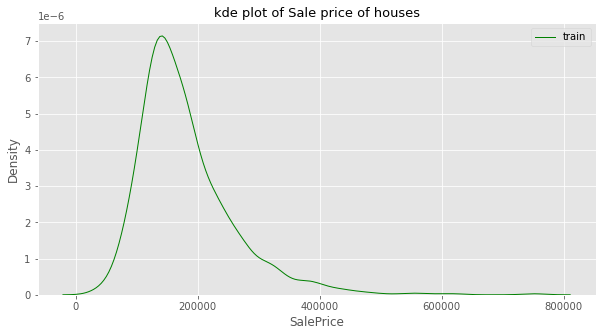

In [23]:
fig = plt.figure(figsize=(10, 5))
ax = sns.kdeplot(data=train, x='SalePrice', color='green', label='train', linewidth= 1)
plt.legend()
ax.set_title('kde plot of Sale price of houses', fontsize=13)

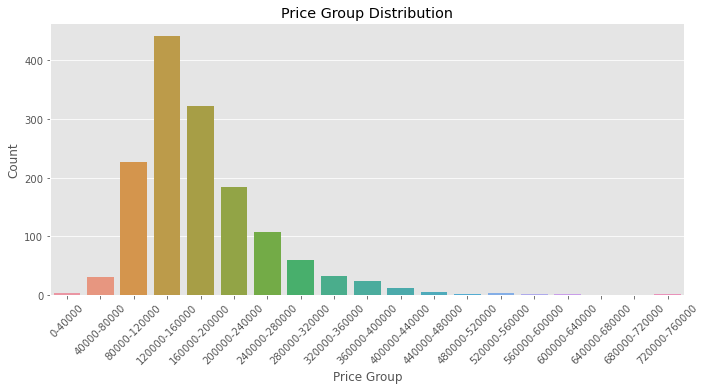

In [31]:
fig = plt.figure(figsize=(25, 5))
# Create a figure and subplots
ax1 = plt.subplot(1, 2, 1)

bins = list(range(0, 800000, 40000))
labels = [f"{start}-{end}" for start, end in zip(bins[:-1], bins[1:])]

# Segment people by age
train['Price Group'] = pd.cut(train['SalePrice'], bins=bins, labels=labels, right=False)

train['Price Group'] = train['Price Group'].astype(str)

sns.countplot(x='Price Group', data=train, order=labels)

ax1.set_xlabel('Price Group')
ax1.set_ylabel('Count')
ax1.set_title('Price Group Distribution')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()





We can see that some prices are outliers that can be removed to improve the accuracy of our data analysis.

Prices over 500000 can be removed.

## Alley impact on house price

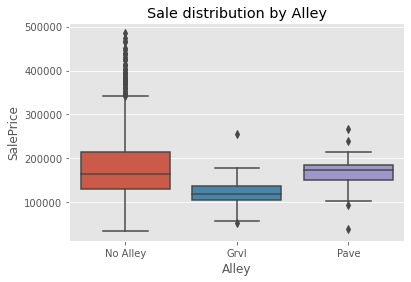

In [22]:
sns.boxplot(x='Alley', y='SalePrice', data=train[train['SalePrice']< 500000])
plt.title('Sale distribution by Alley')
plt.show()

In [19]:
# price of houses with gravel road alley
train[train['Alley']=='Grvl']['SalePrice'].mean()



122219.08

In [24]:
# price of houses with pave road alley
train[train['Alley']=='Pave']['SalePrice'].mean()


168000.58536585365

In [25]:
# price of houses without alley
train[train['Alley']=='No Alley']['SalePrice'].mean()

183452.13148283417

It can be concluded that the prices of houses with Gravel road alleys are significantly lower than paved houses or no alley houses

In [13]:
train['SalePrice'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


## Year sold impact on House price

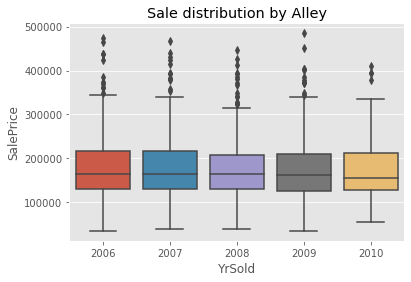

In [26]:
sns.boxplot(x='YrSold', y='SalePrice', data=train[train['SalePrice']< 500000])
plt.title('Sale distribution by Alley')
plt.show()

We can see that the year when the house was sold has little impact on house prices.

# Sale type impact on house price

> Types are:

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [5]:
train['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

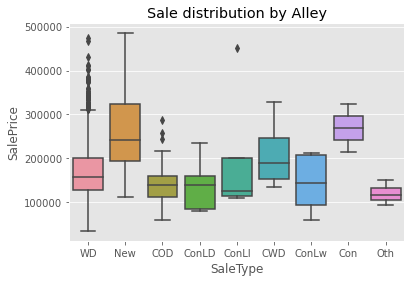

In [6]:
sns.boxplot(x='SaleType', y='SalePrice', data=train[train['SalePrice']< 500000])
plt.title('Sale distribution by Alley')
plt.show()

From the boxplot above, we could conclude that the sale type has relatively sinificant impact on prices.

Specifically, New houses and Court Officer Deed/Estate can be sold at higher prices.


In [10]:
train['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

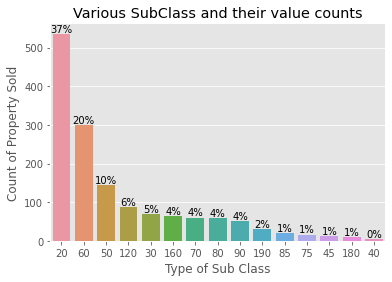

In [20]:
# plt.figure(figsize=(14,10))
# Making Custom Color Palette and setting in reverse order
# green_palette = sns.color_palette('Greens', len(df_subclass_price)*2)[::-1]

# Calculate the count of each category
category_counts = train['MSSubClass'].value_counts()

# Sort the categories based on their counts in descending order
sorted_categories = category_counts.sort_values(ascending=False).index

# Plot the countplot with the sorted categories
ax = sns.countplot(data=train, x='MSSubClass', order=sorted_categories)
plt.xlabel("Type of Sub Class")
plt.ylabel("Count of Property Sold")
plt.title("Various SubClass and their value counts")

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(train)*100:,.0f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Houses that are 1-STORY 1946 & NEWER ALL STYLES make up 37% of all houses.

Text(0.5, 1.0, 'Mean Value by Group')

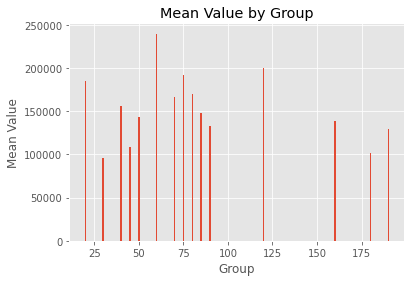

In [22]:
ax = train.groupby('MSSubClass')['SalePrice'].mean()
plt.bar(x = train)
plt.xlabel('Group')
plt.ylabel('Mean Value')
plt.title('Mean Value by Group')

Int64Index([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190], dtype='int64')